In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
path = '/content/AB_NYC_2019.csv'
df_NYC = pd.read_csv(path,)
df_NYC.head()

In [8]:
df_NYC.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [9]:
df_NYC.shape[0]

48895

In [ ]:
df_NYC.isnull().sum()

In [9]:
df_NYC["host_name"].fillna("Unknown", inplace=True)

In [10]:
#Check for the missing values again
df_NYC.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [11]:
duplicates = df_NYC[df_NYC.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365]
Index: []


In [12]:
# 1) Calculate How many properties in each neighbourhood group

count_properties = df_NYC['neighbourhood_group'].value_counts()
print(count_properties)


Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64


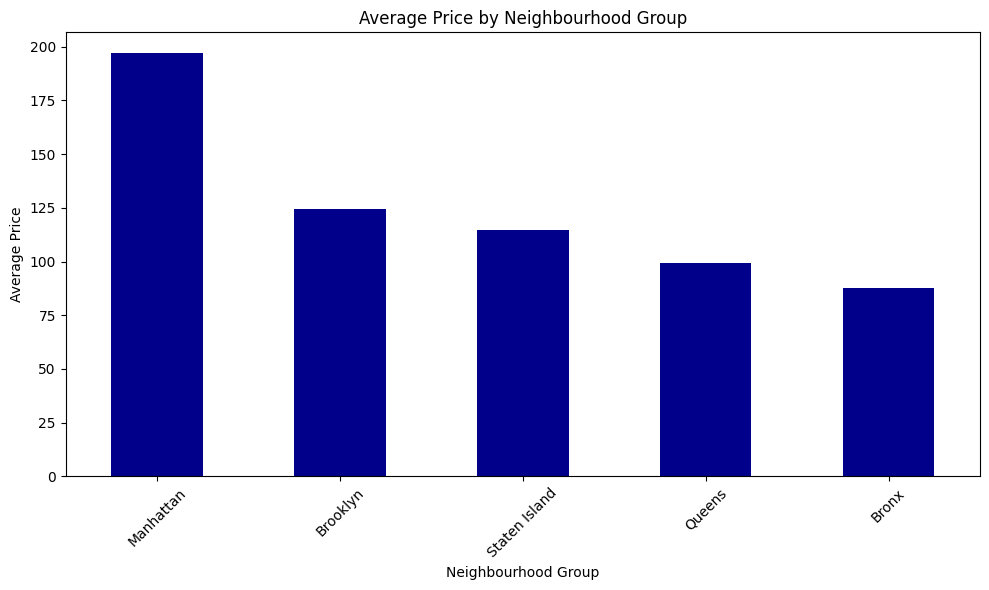

In [13]:

# 2) Which Neighbour Hood Group Has highest prices use bar chart to show this for all neighbourhood groups

# Group the data by neighbourhood_group and calculate the mean price for each group
average_prices = df_NYC.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
average_prices.plot(kind='bar', color='darkblue')
plt.title('Average Price by Neighbourhood Group')
plt.ylabel('Average Price')
plt.xlabel('Neighbourhood Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


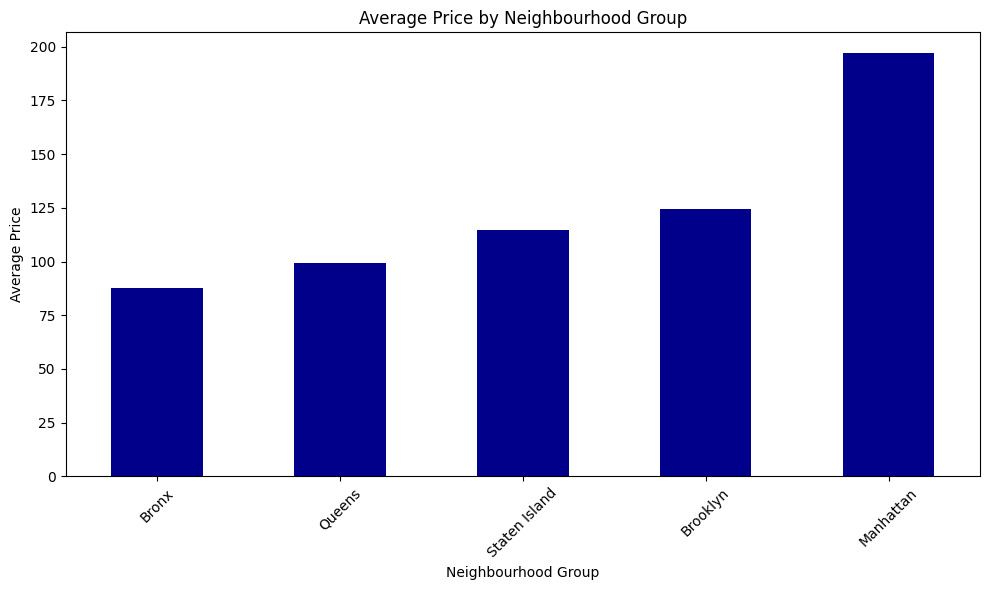

In [14]:
# 3) Which Neighbourhood group has lowest prices use bar chart to show this for all neighbourhood groups


average_prices_asc = df_NYC.groupby('neighbourhood_group')['price'].mean().sort_values()

# Plotting
plt.figure(figsize=(10, 6))
average_prices_asc.plot(kind='bar', color='darkblue')
plt.title('Average Price by Neighbourhood Group')
plt.ylabel('Average Price')
plt.xlabel('Neighbourhood Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [15]:
# 4) Highest and lowest price airbnb in each Neighbour Hood Group

highest_prices = df_NYC.groupby('neighbourhood_group')['price'].max()
lowest_prices = df_NYC.groupby('neighbourhood_group')['price'].min()

price_comparison = pd.DataFrame({'Highest Price': highest_prices, 'Lowest Price': lowest_prices})
print(price_comparison)


                     Highest Price  Lowest Price
neighbourhood_group                             
Bronx                         2500             0
Brooklyn                     10000             0
Manhattan                    10000             0
Queens                       10000            10
Staten Island                 5000            13


In [17]:
# 5) Which Host has highest count of properties
df_NYC["host_name"].fillna("Unknown", inplace=True)

host_counts = df_NYC['host_name'].value_counts()

# Get the host with the highest count of properties
top_host = host_counts.idxmax()
top_host_count = host_counts.max()

print('Host with highest count of properties is', top_host, 'with',top_host_count,'properties')


Host with highest count of properties is Michael with 417 properties


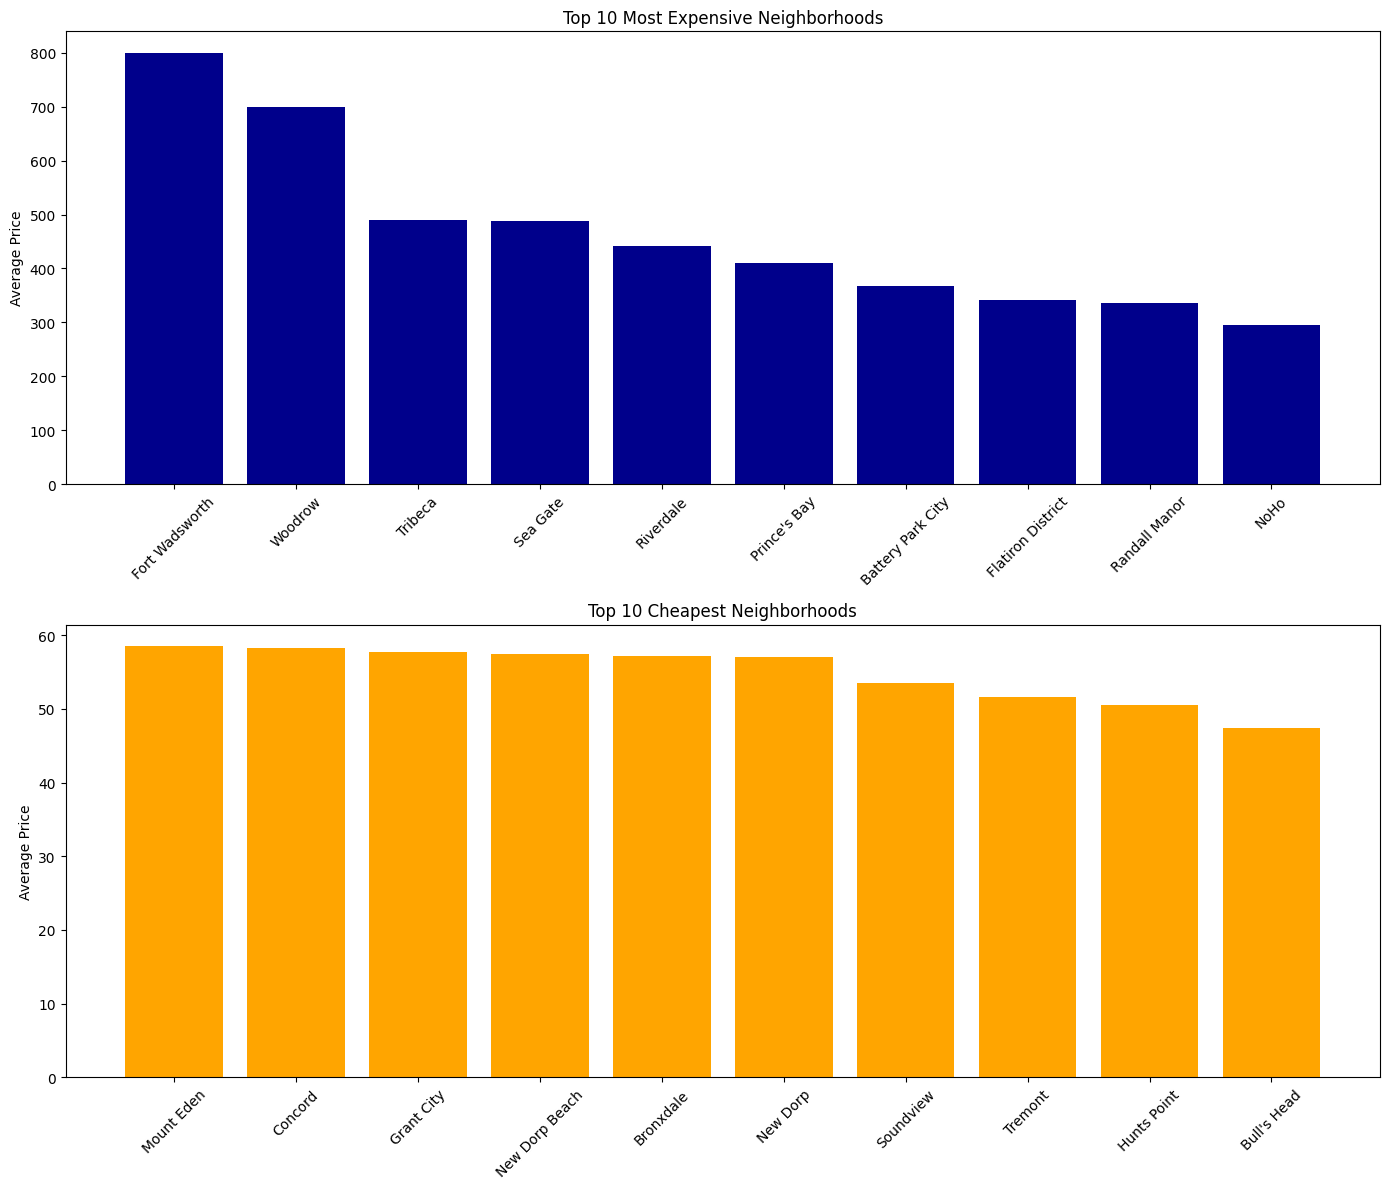

In [19]:
# 6) Which neighbourhood is most expensive and cheapest top 10 barchart

# Average price for each neighborhood
neighborhood_prices = df_NYC.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)

#Top 10 most expensive and cheapest neighborhoods
top_10_expensive = neighborhood_prices.head(10)
top_10_cheapest = neighborhood_prices.tail(10)

# Plotting the data
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))

# Top 10 most expensive neighborhoods Plot
ax1.bar(top_10_expensive.index, top_10_expensive.values, color='darkblue')
ax1.set_title('Top 10 Most Expensive Neighborhoods')
ax1.set_ylabel('Average Price')
ax1.tick_params(axis='x', rotation=45)

# Top 10 cheapest neighborhoods Plot
ax2.bar(top_10_cheapest.index, top_10_cheapest.values, color='orange')
ax2.set_title('Top 10 Cheapest Neighborhoods')
ax2.set_ylabel('Average Price')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


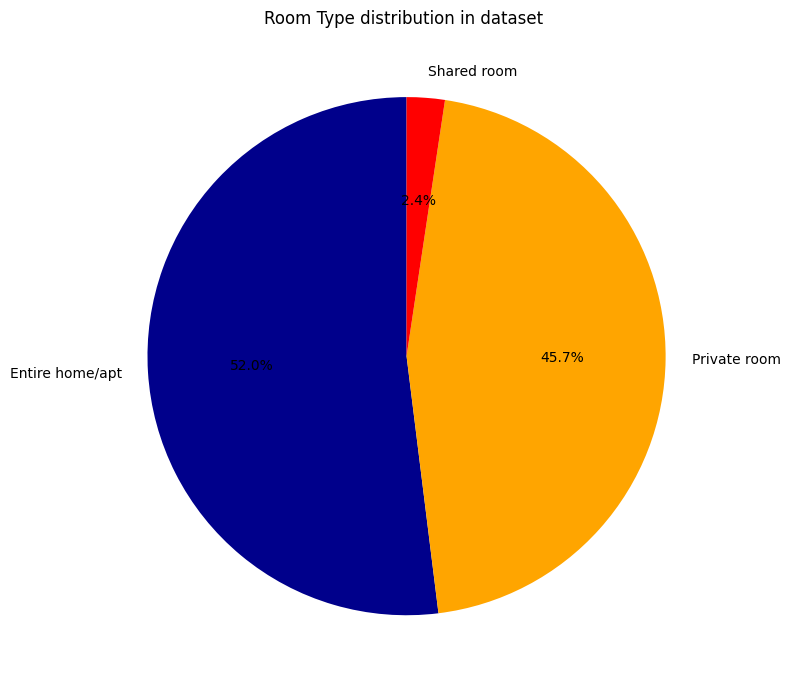

In [18]:
# # 7) Count different type of room_type and do a pie chart showing % of each room type in overall dataset

# Different  room_type count
room_type_counts = df_NYC['room_type'].value_counts()

fig, ax = plt.subplots(figsize=(10, 7))
ax.pie(room_type_counts, labels=room_type_counts.index, autopct='%1.1f%%', startangle=90, colors=['darkblue', 'orange', 'Red'])
ax.set_title('Room Type distribution in dataset ')
plt.tight_layout()
plt.show()


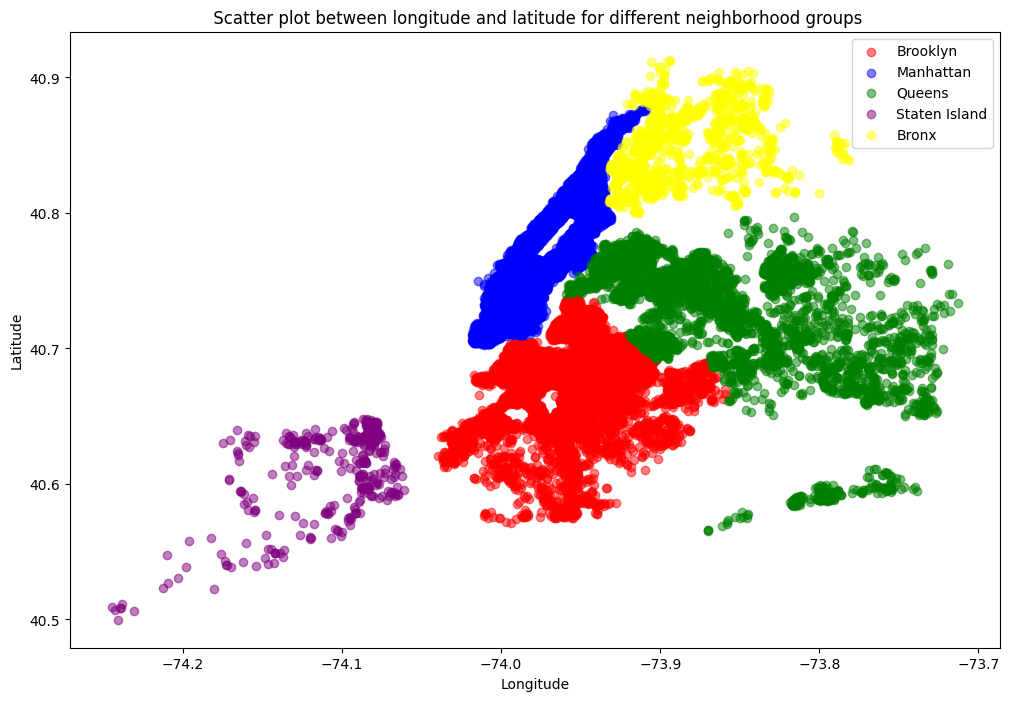

In [19]:
# # 8) scatter plot between longitutude and latitude for different neighbourhood groups

# Scatter plot between longitude and latitude for different neighborhood groups
unique_neighborhood_groups = df_NYC['neighbourhood_group'].unique()
colors = ['red', 'blue', 'green', 'purple', 'yellow']

plt.figure(figsize=(12, 8))

for index, group in enumerate(unique_neighborhood_groups):
    subset = df_NYC[df_NYC['neighbourhood_group'] == group]
    plt.scatter(subset['longitude'], subset['latitude'], c=colors[index], label=group, alpha=0.5)

plt.title(' Scatter plot between longitude and latitude for different neighborhood groups')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(False)
plt.show()


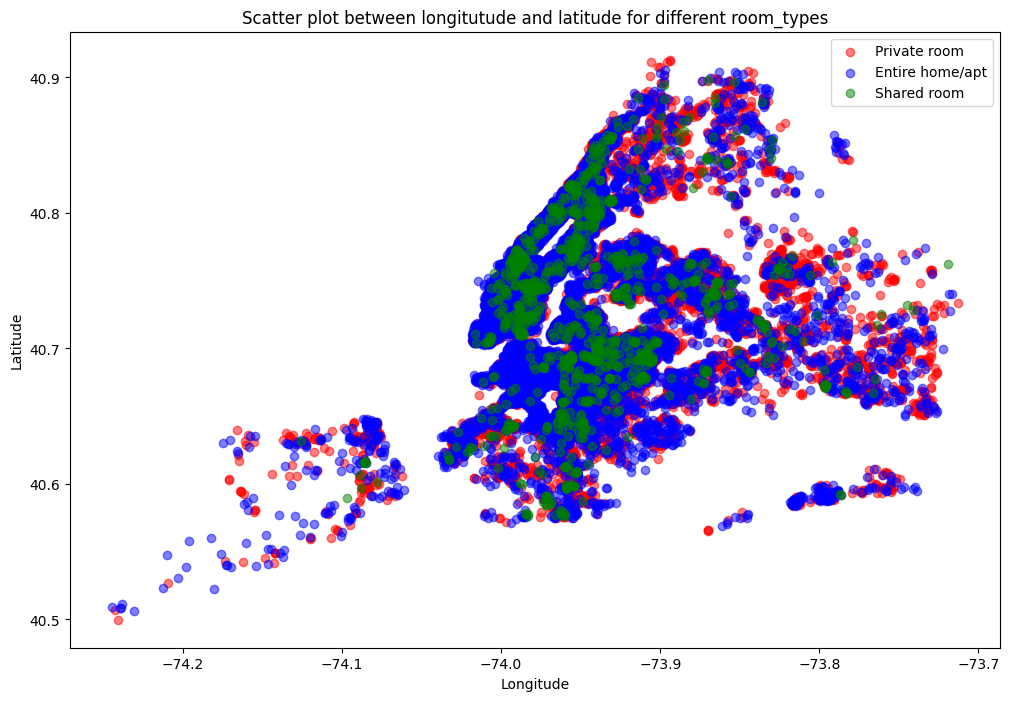

In [20]:
# # 9) scatter plot between longitutude and latitude for different room_types

# Figure for the plot
plt.figure(figsize=(12, 8))

# A loop to plot each room type with a different color
room_types = df_NYC['room_type'].unique()
colors = ['red', 'blue', 'green', 'purple']

for room, color in zip(room_types, colors):
    # Filter the dataset for each room type
    subset = df_NYC[df_NYC['room_type'] == room]

    #scatter plot for each subset (room type)
    plt.scatter(subset['longitude'], subset['latitude'], color=color, label=room, alpha=0.5)

plt.title('Scatter plot between longitutude and latitude for different room_types')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

# Display the plot
plt.show()


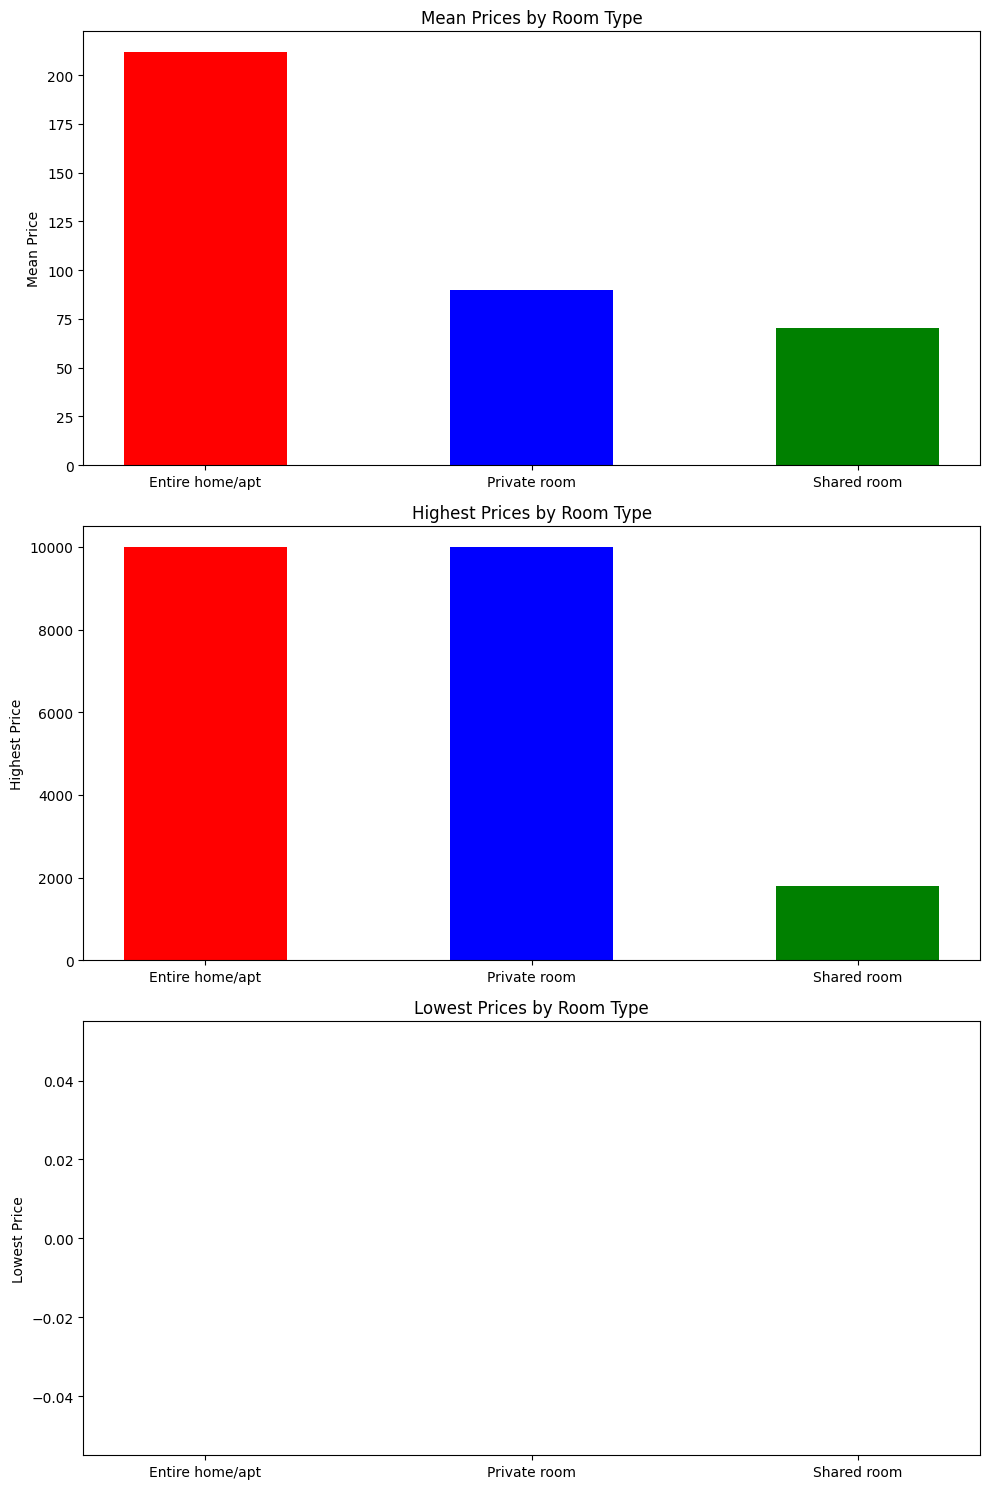

In [21]:

# 10) room_type vs price bar chart for the mean and highest and lowest

# Calculate mean, highest, and lowest prices for each room type
mean_prices = df_NYC.groupby('room_type')['price'].mean()
max_prices = df_NYC.groupby('room_type')['price'].max()
min_prices = df_NYC.groupby('room_type')['price'].min()

# Adjust the bar width for a smaller size
bar_width = 0.5

# Set up the subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot the mean prices
axes[0].bar(mean_prices.index, mean_prices.values, color=['red', 'blue', 'green', 'purple'], width=bar_width)
axes[0].set_title('Mean Prices by Room Type')
axes[0].set_ylabel('Mean Price')

# Plot the highest prices
axes[1].bar(max_prices.index, max_prices.values, color=['red', 'blue', 'green', 'purple'], width=bar_width)
axes[1].set_title('Highest Prices by Room Type')
axes[1].set_ylabel('Highest Price')

# Plot the lowest prices
axes[2].bar(min_prices.index, min_prices.values, color=['red', 'blue', 'green', 'purple'], width=bar_width)
axes[2].set_title('Lowest Prices by Room Type')
axes[2].set_ylabel('Lowest Price')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


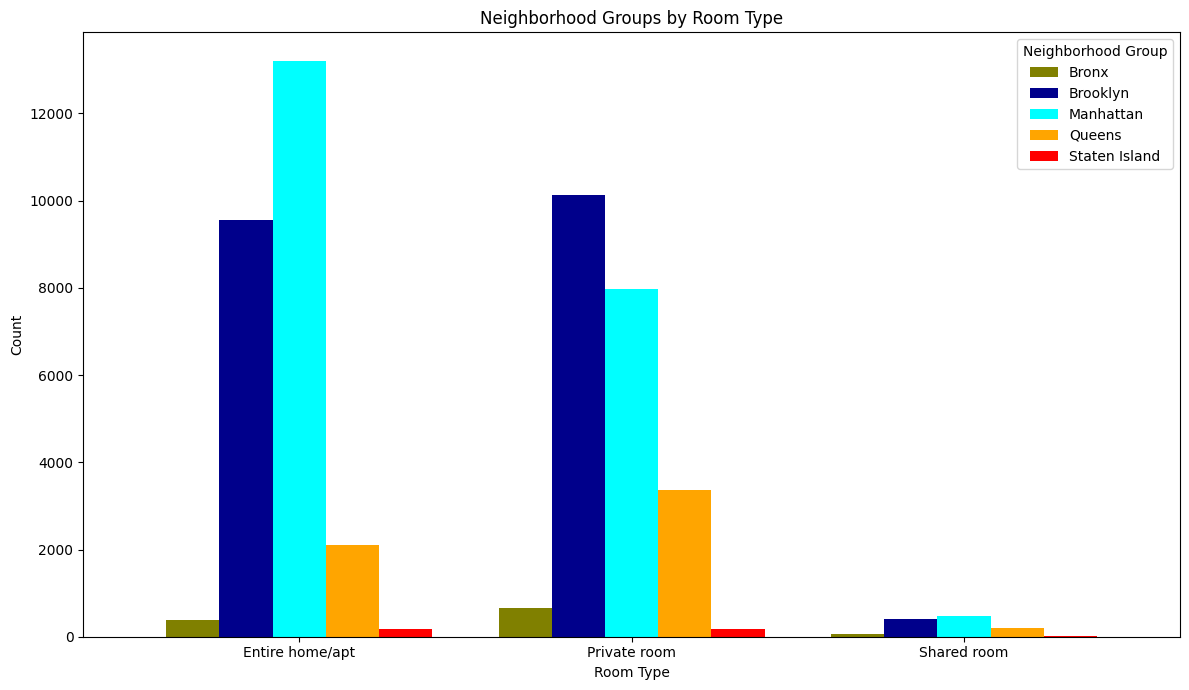

In [22]:
# 11) Do a similar plot to this


# Group by 'room_type' and 'neighbourhood_group' to get counts for each combination
grouped_counts_reverse = df_NYC.groupby(['room_type', 'neighbourhood_group']).size().unstack()

# Define custom colors
colors = ["olive", "darkblue", "cyan", "orange", "red"]  # You can adjust these values as you prefer

# Plotting the group bar chart with custom colors
grouped_counts_reverse.plot(kind='bar', figsize=(12,7), width=0.8, color=colors)

plt.title('Neighborhood Groups by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Set x-labels to horizontal
plt.tight_layout()
plt.legend(title='Neighborhood Group')
plt.show()



#**Part Two: Machine Learning Models**

In [24]:
# # find missing host name ids and fill the values with host name from other rows

# # Price prediction with all regression models linear regression,polynomial,SVR,Random Regressor, Decison Tree Regressor

# # Columns to use neighbourhood_group,latitude,longitude,room_type,minimum_nights,number_of_reviews,
# reviews_per_month,calculated_host_listings_count

# # first method  is to fill with zero

# #  second method check if the same host id has other properties with reviews_per_month take mean only if
# num_of_reviews is greater than 0 and fill nans or if not then fill with zero

# # 1 lak nan values in reviews_per_month

# # first check if num_of_reviews>0 if no fill with zero else find the host_id. Find all properties of
# this host and do mean of reviews_per_month to fill the nan value


#**Data Preprocessing**

In [ ]:
df_NYC.head()

In [25]:
#Replacing missing values in reviews_per_month with zeros
df_NYC['reviews_per_month'].fillna(0,inplace = True)

In [4]:
#Checking to see if the missing values are been replaced
df_NYC.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
#Selection of dependent and independent data or columns
independent_col = df_NYC.iloc[:, 4:15].drop(columns=['neighbourhood', 'price', 'last_review'])
independent_col.head()

In [8]:
dependent_col = df_NYC.iloc[:,9:10]
dependent_col.head()

,price
0,149
1,225
2,150
3,89
4,80


In [29]:
X = independent_col.values
X

array([['Brooklyn', 40.64749, -73.97237, ..., 9, 0.21, 6],
       ['Manhattan', 40.75362, -73.98377, ..., 45, 0.38, 2],
       ['Manhattan', 40.80902, -73.9419, ..., 0, 0.0, 1],
       ...,
       ['Manhattan', 40.81475, -73.94867, ..., 0, 0.0, 1],
       ['Manhattan', 40.75751, -73.99112, ..., 0, 0.0, 6],
       ['Manhattan', 40.76404, -73.98933, ..., 0, 0.0, 1]], dtype=object)

In [30]:
y = dependent_col.values
y

array([[149],
       [225],
       [150],
       ...,
       [115],
       [ 55],
       [ 90]])

In [31]:
#Handling Categorical columns with OneHotEncoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

trans = ColumnTransformer([('encoder',OneHotEncoder(),[0,3])], remainder = 'passthrough')
X = trans.fit_transform(X)
X

array([[0.0, 1.0, 0.0, ..., 9, 0.21, 6],
       [0.0, 0.0, 1.0, ..., 45, 0.38, 2],
       [0.0, 0.0, 1.0, ..., 0, 0.0, 1],
       ...,
       [0.0, 0.0, 1.0, ..., 0, 0.0, 1],
       [0.0, 0.0, 1.0, ..., 0, 0.0, 6],
       [0.0, 0.0, 1.0, ..., 0, 0.0, 1]], dtype=object)

In [32]:
#Data spliting into train and Testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [33]:
X_train

array([[0.0, 0.0, 1.0, ..., 27, 0.46, 1],
       [1.0, 0.0, 0.0, ..., 9, 1.19, 2],
       [0.0, 0.0, 1.0, ..., 28, 0.82, 1],
       ...,
       [0.0, 0.0, 1.0, ..., 14, 3.72, 2],
       [0.0, 1.0, 0.0, ..., 4, 4.0, 1],
       [0.0, 0.0, 1.0, ..., 201, 2.84, 1]], dtype=object)

#**Multi Linear Regression**

In [40]:
# 1. Import the necessary module
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 2. Initialize an instance of LinearRegression
regressor = LinearRegression()

# 3. Fit the model using the training data
regressor.fit(X_train, y_train)


# 4. Get predictions on the test data
y_pred = regressor.predict(X_test)

# 5. Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [35]:
print(regressor.intercept_)

[-20422.12130502]


In [36]:
mae,mse,r2

(73.72013809845424, 49467.74531263952, 0.10121124715955698)

#**Predicting the Test set results**

In [37]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[266.42 225.  ]
 [256.87 649.  ]
 [176.35 300.  ]
 ...
 [ 75.4  150.  ]
 [ 61.02 149.  ]
 [181.94 169.  ]]


#**Polynomial regression with degree 3**

In [42]:
# Polynomial regression with degree 3
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)

# Train the model
regressor = LinearRegression()
regressor.fit(X_train_poly, y_train)

# Predicting on training data for evaluation
y_train_pred = regressor.predict(X_train_poly)
mse_train = mean_squared_error(y_train, y_train_pred)

# Predicting on the test data for evaluation
X_test_poly = poly.transform(X_test)
y_test_pred = regressor.predict(X_test_poly)
mse_test = mean_squared_error(y_test, y_test_pred)



print("Training MSE:", mse_train)
print("Test MSE:", mse_test)

Training MSE: 51546.55188288236
Test MSE: 78883.5819275249


#**Support Vector Regression**

In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

# Feature Scaling
sc_X = StandardScaler()
sc_y = StandardScaler()

X_train = sc_X.fit_transform(X_train)
y_train_scaled = sc_y.fit_transform(y_train)  # Reshaping y_train to 2D for scaling

# Fitting the SVR to the dataset with RBF kernel
regressor = SVR(kernel='rbf')
regressor.fit(X_train, y_train_scaled.ravel())  # Flattening y_train_scaled to 1D for training


# Predict the training set results
y_train_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_train)).reshape(-1, 1))

# Predicting a new result
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)).reshape(-1, 1))  # Reshaping predictions to 2D for inverse transform


# Compute metrics for the training set
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Compute metrics for the test set
mse_test = mean_squared_error(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

mse_train, mae_train, r2_train, mse_test, mae_test, r2_test


#**Decision Tree**

In [47]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor(random_state=0)

# Fiting the regressor to the training data
tree_regressor.fit(X_train, y_train)

# Predicting on both training and test data
y_train_pred_tree = tree_regressor.predict(X_train)
y_test_pred_tree = tree_regressor.predict(X_test)

# Evaluating the model's performance on Train data
mse_train_tree = mean_squared_error(y_train, y_train_pred_tree)
r2_train_tree = r2_score(y_train, y_train_pred_tree)

# Evaluating the model's performance on Test data
mse_test_tree = mean_squared_error(y_test, y_test_pred_tree)
r2_test_tree = r2_score(y_test, y_test_pred_tree)

mse_train_tree, r2_train_tree, mse_test_tree, r2_test_tree


(0.0, 1.0, 59001.54882912363, -0.07201021903524762)

#**Random Forest Analysis**

In [49]:
from sklearn.ensemble import RandomForestRegressor

# Initializing the RandomForestRegressor
forest_regressor = RandomForestRegressor(n_estimators=100, random_state=0)

# Fitting the regressor to the training data
forest_regressor.fit(X_train, y_train.ravel())

# Predicting on both training and test data
y_train_pred_forest = forest_regressor.predict(X_train)
y_test_pred_forest = forest_regressor.predict(X_test)

# Evaluation
mse_train_forest = mean_squared_error(y_train, y_train_pred_forest)
r2_train_forest = r2_score(y_train, y_train_pred_forest)

mse_test_forest = mean_squared_error(y_test, y_test_pred_forest)
r2_test_forest = r2_score(y_test, y_test_pred_forest)

print("Training Metrics:")
print(f"Mean Squared Error: {mse_train_forest}")
print(f"R2 Score: {r2_train_forest}")

print("\nTest Metrics:")
print(f"Mean Squared Error: {mse_test_forest}")
print(f"R2 Score: {r2_test_forest}")


Training Metrics:
Mean Squared Error: 7258.407520459658
R2 Score: 0.8755662077519738

Test Metrics:
Mean Squared Error: 226373.84033454338
R2 Score: -3.1130288098657113
